***

***
<span style="font-size: 18pt"> <span style="color:blue">
    **Step. 1 Use MCA to find cell type annotation**
    </span><br>
***
 <blockquote>
 main input: 
     cells_filtered <- readRDS("cells_Nick_filtered.rds")
 main output: 
 </blockquote>

In [1]:
getwd()

[1] "/vf/users/BCELL_RNASEQ/borrowSomeSpace/intestine/notebooks"

In [4]:
# Load Packages
lib = function(lib_name){
    suppressPackageStartupMessages(library(lib_name, character.only = T))
    #library(lib_name, character.only = T)
}
lib("Seurat")
lib("dplyr")
lib("ggplot2")
lib("cowplot")
lib("stringr")
lib('gplots')

Warning message:
“package ‘dplyr’ was built under R version 4.0.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.3”
Warning message:
“package ‘stringr’ was built under R version 4.0.3”
Warning message:
“package ‘gplots’ was built under R version 4.0.3”


# load data

In [1]:
cells <- readRDS("../ori_data/your_seuratObject.rds")

In [2]:
cells

An object of class Seurat 
41271 features across 35005 samples within 4 assays 
Active assay: integrated (3000 features, 3000 variable features)
 3 other assays present: RNA, HTO, SCT
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


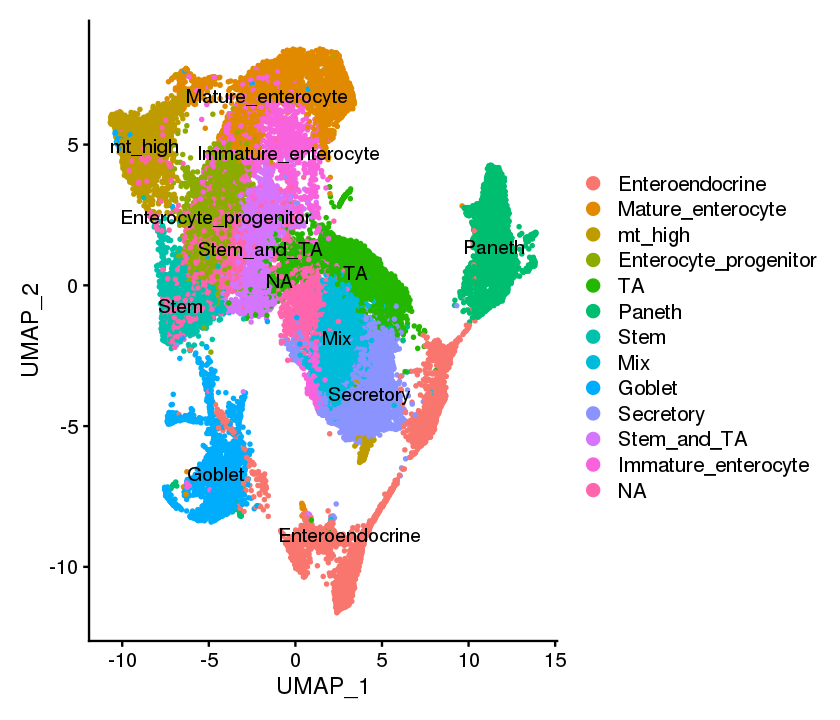

In [5]:
options(repr.plot.width=7, repr.plot.height=6) 
DimPlot(cells, reduction = "umap", label = TRUE, pt.size = 0.5)

# save it as loom files

In [12]:
convertNA=function(obj){
    for(j in 1:ncol(obj@meta.data)){
        if(is.factor(obj@meta.data[,j]) == T){
        obj@meta.data[,j] = as.character(obj@meta.data[,j]) # Force the variable type to be character
        obj@meta.data[,j][is.na(obj@meta.data[,j])] <- "N.A"
    }
    if(is.character(obj@meta.data[,j]) == T){
        obj@meta.data[,j][is.na(obj@meta.data[,j])] <- "N.A"
     }
    }
    return(obj)
}


In [21]:
library(Seurat)
pfile <- as.loom(cells, filename = "cells.loom", 
    verbose = FALSE)

Transposing input data: loom file will show input columns (cells) as rows and input rows (features) as columns

This is to maintain compatibility with other loom tools

Adding: CellID

Adding: Gene

Adding: Selected

Adding: orig_ident

Adding: nCount_RNA

Adding: nFeature_RNA

Adding: nCount_HTO

Adding: nFeature_HTO

Adding: HTO_maxID

Adding: HTO_secondID

Adding: HTO_margin

Adding: HTO_classification

Adding: HTO_classification_global

Adding: hash_ID

Adding: nCount_SCT

Adding: nFeature_SCT

Adding: percent_mt

Adding: integrated_snn_res_1

Adding: seurat_clusters

Adding: treatment

Adding: celltypes

Adding: ClusterID

Adding: ClusterName

